In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_excel("cars.xlsx")
data.head()

,Car,Model,Volume,Weight,CO2,Mileage
0,Toyota,Aygo,1000,790,99,25
1,Mitsubishi,Space Star,1200,1160,95,23
2,Skoda,Citigo,1000,929,95,37
3,Fiat,500,900,865,90,38
4,Mini,Cooper,1500,1140,105,38


In [3]:
X=data[['Weight','Volume']]
Y=data['CO2']

#### Adding a column of ones for the bias term

In [4]:
X = pd.concat([pd.Series(1, index = X.index, name = '00'),X],axis=1)
X.head()

,00,Weight,Volume
0,1,790,1000
1,1,1160,1200
2,1,929,1000
3,1,865,900
4,1,1140,1500


In [5]:
X.head()

,00,Weight,Volume
0,1,790,1000
1,1,1160,1200
2,1,929,1000
3,1,865,900
4,1,1140,1500


In [6]:
b_cap = np.linalg.inv(X.T@X)@(X.T@Y)
b_cap

array([7.96947193e+01, 7.55094727e-03, 7.80525753e-03])

In [7]:
# p1 = input("Enter the volume: ")
# p2 = input("Enter the Weight: ")
# output = np.array([1,int(p1),int(p2)]).dot(b_cap)
# print("The expected CO2 is:",output)

## Model building and train-test split

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score


In [9]:
X=data[['Weight','Volume']]
Y=data['CO2']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=100)

In [11]:
model = linear_model.LinearRegression()

In [12]:
model.fit(X_train,y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)

In [14]:
print(mean_squared_error(y_pred, y_test))

63.39765310998794


In [15]:
print(mean_absolute_error(y_test, y_pred))

6.901980901636316


In [16]:
print(r2_score(y_test, y_pred))

-0.07468703086418338


## Lab Assesment using given dataset

In [17]:
data = pd.read_csv("carscollated2017.csv")
data.head()

,car,model,price,year,mileage,location
0,Toyota Prius,Four,18900,2014,33769,40202
1,Toyota Prius,Four,18000,2014,24318,40202
2,Toyota Prius,Five,15995,2014,50601,40202
3,Toyota Prius,Two,15893,2015,34312,40202
4,Toyota Prius,Two,15500,2014,36927,40202


In [18]:
data['mileage2']=data['mileage']/1000
data.head()

,car,model,price,year,mileage,location,mileage2
0,Toyota Prius,Four,18900,2014,33769,40202,33.769
1,Toyota Prius,Four,18000,2014,24318,40202,24.318
2,Toyota Prius,Five,15995,2014,50601,40202,50.601
3,Toyota Prius,Two,15893,2015,34312,40202,34.312
4,Toyota Prius,Two,15500,2014,36927,40202,36.927


#### Model - 1

In [19]:
model = linear_model.LinearRegression()

In [20]:
data['price'].astype('int')

0      18900
1      18000
2      15995
3      15893
4      15500
       ...  
826     9994
827    18391
828    17656
829    17491
830     9577
Name: price, Length: 831, dtype: int32

In [21]:
import matplotlib.pyplot as plt

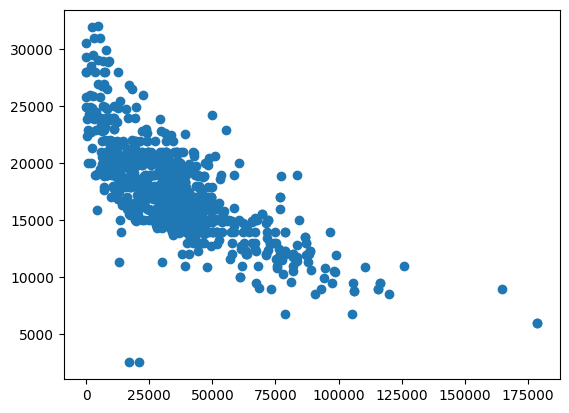

In [22]:
plt.scatter(data['mileage'],data['price'])
plt.show()